# Data PreProcessing
- raw data의 전처리
- 원문데이터(영어)의 번역을 통한 한국어 라벨 데이터 구축 
- 번역과정에서 데이터 품질저하를 방지하기 위해 번역품질 검수 
- 기존의 웹번역의 잦은오류, 전처리미흡을 해결하기 위해 googletrans라이브러리를 이용하여 재번역 

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re

In [ ]:
# 크롤링을 통해 확보한 국내외 대학의 SDGS보고서의 라벨별 데이터  (raw) / 기존 웹 이용한 번역 

df = pd.read_csv('raw_7388.csv')
df = df[['국가','대학교명','내용','분류','번역']]
df

,국가,대학교명,내용,분류,번역
0,영국,Leicester,Prof. Vostanis’s research (Psychology) focuses...,1,Vostanis 교수의 연구(심리학)는 특히 저소득 국가에 초점을 맞춘 아동 정신 ...
1,영국,Leicester,Efforts to improve sustainable crop developmen...,2,지속 가능한 작물 개발을 개선하기 위한 노력은 University of Leices...
2,영국,Leicester,Prof Sally Singh is directing RECHARGE that fo...,3,Sally Singh 교수는 저소득 및 중간 소득 국가에서 적절한 폐 재활 프로그램...
3,영국,Leicester,The London to Leicester partnership scheme has...,4,London to Leicester 파트너십 계획은 학생 Polar3 우편번호를 기...
4,영국,Leicester,Dr Eugenia Caracciolo di Torella from Leiceste...,5,Leicester Law School의 Eugenia Caracciolo di To...
...,...,...,...,...,...
7383,영국,University of East Anglia,Aurora Students Organisation\nUEA is the curre...,17,오로라 학생 협회\nUEA는 현재 오로라 학생회의 주재 기관이다. 이 그룹은 오로라...
7384,영국,University of East Anglia,SU partnerships\nOur SU has partnerships with ...,17,"SU 파트너십\n우리 SU는 모두를 위한 건강, 포괄성 및 번영을 촉진하는 여러 N..."
7385,영국,University of East Anglia,Operations\nSDG Accord\nUEA has been a signato...,17,운영\nSDG 협정\nUEA는 2019년부터 SDG 협정에 서명하고 있다. 협정 헌...
7386,영국,University of East Anglia,Aurora Sustainability Working Group\nAs a memb...,17,"오로라 지속가능성 워킹그룹\n오로라 네트워크의 일원으로서, UEA는 오로라의 지속가..."


In [ ]:
df.isnull().sum()

국가        0
대학교명      0
내용      315
분류        0
번역        0
dtype: int64

### 국내대학 결측치 확인

In [ ]:
# 국내대학 원문 결측치 추출 ->  모델 성능평가를 위한 test_data로 사용 
df_KOR=df[df['내용'].isnull()]
df_KOR

,국가,대학교명,내용,분류,번역
1259,한국,서울대학교,NaN,1,저소득층 학생을 위한 지원\n∙ 서울대학교에서는 저소득층 학생을 대상으로 등록금 장...
1260,한국,서울대학교,NaN,2,구성원의 식사/기아 문제 해결 - “천원의 식사” ∙서울대학교에서는 재학생 대상으로...
1261,한국,서울대학교,NaN,2,지속가능한 농업 지식/기술 제공 ∙농업생명과학대학에서는 지속가능농업 분야 관련 정규...
1262,한국,서울대학교,NaN,3,"지역사회 건강과 복지 향상에 기여\n∙ 지역사회 공공 보건활동, 의과대학의 지역사회..."
1263,한국,서울대학교,NaN,3,세계 보건기관과의 협력 서울대학교 병원 공공보건 의료사업단은 세계보건기구\n(WHO...
...,...,...,...,...,...
1667,한국,강원대학교,NaN,17,특강을 통해 지역주민에게 기후변화의 위험에 대한 경각심 고취
1668,한국,강원대학교,NaN,17,"학내 구성원 및 지역주민 대상 미술, 음악, 스포츠 등 다양한 분야의 교육과정 제공"
1669,한국,강원대학교,NaN,17,"학내 구성원 및 지역주민 대상 영어, 프랑스어, 중국어 등의 외국어 강좌 제공"
1670,한국,강원대학교,NaN,17,강원국제개발협력센터 뉴스레터에 SDG를 안내하여 구성원의 인식 제고


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0, flags=flags)


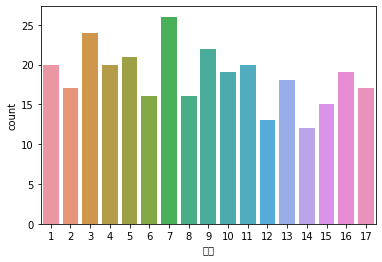

In [ ]:
# 분포확인
import seaborn as sns
sns.countplot(x = df_KOR['분류'])

In [ ]:
# 전처리 

# 줄바꿈 제거 
from gc import enable
df_KOR['번역']= df_KOR['번역'].str.replace(pat=r'\n',repl=r' ',regex=True)


#url 제거
 # http로 시작되는 url
 # http로 시작되지 않는 url
df_KOR['번역']= df_KOR['번역'].str.replace(pat=r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',repl=r' ',regex=True)
df_KOR['번역']= df_KOR['번역'].str.replace(pat=r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)',repl=r' ',regex=True)

# 공백 두칸 한칸으로 붙이기
df_KOR['번역']= df_KOR['번역'].str.replace(pat=r'  ',repl=r' ',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [ ]:
df_KOR = df_KOR[['분류','번역']]
df_KOR = df_KOR.reset_index()

,index,분류,번역
0,1259,1,저소득층 학생을 위한 지원 ∙ 서울대학교에서는 저소득층 학생을 대상으로 등록금 장 ...
1,1260,2,구성원의 식사/기아 문제 해결 - “천원의 식사” ∙서울대학교에서는 재학생 대상으로...
2,1261,2,지속가능한 농업 지식/기술 제공 ∙농업생명과학대학에서는 지속가능농업 분야 관련 정규...
3,1262,3,"지역사회 건강과 복지 향상에 기여 ∙ 지역사회 공공 보건활동, 의과대학의 지역사회학..."
4,1263,3,세계 보건기관과의 협력 서울대학교 병원 공공보건 의료사업단은 세계보건기구 (WHO)...
...,...,...,...
310,1667,17,특강을 통해 지역주민에게 기후변화의 위험에 대한 경각심 고취
311,1668,17,"학내 구성원 및 지역주민 대상 미술, 음악, 스포츠 등 다양한 분야의 교육과정 제공"
312,1669,17,"학내 구성원 및 지역주민 대상 영어, 프랑스어, 중국어 등의 외국어 강좌 제공"
313,1670,17,강원국제개발협력센터 뉴스레터에 SDG를 안내하여 구성원의 인식 제고


In [ ]:
# csv로 내보내기 
# df_KOR.to_csv('/content/drive/MyDrive/ESGBERT/KOR_test.csv')

In [ ]:
# 국내대학 원문 결측치 제거 
df = df.dropna()
df

,국가,대학교명,내용,분류,번역
0,영국,Leicester,Prof. Vostanis’s research (Psychology) focuses...,1,Vostanis 교수의 연구(심리학)는 특히 저소득 국가에 초점을 맞춘 아동 정신 ...
1,영국,Leicester,Efforts to improve sustainable crop developmen...,2,지속 가능한 작물 개발을 개선하기 위한 노력은 University of Leices...
2,영국,Leicester,Prof Sally Singh is directing RECHARGE that fo...,3,Sally Singh 교수는 저소득 및 중간 소득 국가에서 적절한 폐 재활 프로그램...
3,영국,Leicester,The London to Leicester partnership scheme has...,4,London to Leicester 파트너십 계획은 학생 Polar3 우편번호를 기...
4,영국,Leicester,Dr Eugenia Caracciolo di Torella from Leiceste...,5,Leicester Law School의 Eugenia Caracciolo di To...
...,...,...,...,...,...
7383,영국,University of East Anglia,Aurora Students Organisation\nUEA is the curre...,17,오로라 학생 협회\nUEA는 현재 오로라 학생회의 주재 기관이다. 이 그룹은 오로라...
7384,영국,University of East Anglia,SU partnerships\nOur SU has partnerships with ...,17,"SU 파트너십\n우리 SU는 모두를 위한 건강, 포괄성 및 번영을 촉진하는 여러 N..."
7385,영국,University of East Anglia,Operations\nSDG Accord\nUEA has been a signato...,17,운영\nSDG 협정\nUEA는 2019년부터 SDG 협정에 서명하고 있다. 협정 헌...
7386,영국,University of East Anglia,Aurora Sustainability Working Group\nAs a memb...,17,"오로라 지속가능성 워킹그룹\n오로라 네트워크의 일원으로서, UEA는 오로라의 지속가..."


### 전처리(영어)

In [ ]:
# 줄바꿈 제거 
from gc import enable
df['내용']= df['내용'].str.replace(pat=r'\n',repl=r' ',regex=True)


#url 제거
 # http로 시작되는 url
 # http로 시작되지 않는 url
df['내용']= df['내용'].str.replace(pat=r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',repl=r' ',regex=True)
df['내용']= df['내용'].str.replace(pat=r'[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)',repl=r' ',regex=True)

# 공백 두칸 한칸으로 붙이기
df['내용']= df['내용'].str.replace(pat=r'  ',repl=r' ',regex=True)

en = []
for sentence in df['내용']:
    en.append(sentence)

en

['Prof. Vostanis’s research (Psychology) focuses on the impact of trauma on child mental health, with particular focus on low-income countries. ',
 'Efforts to improve sustainable crop development are being spearheaded by a collaboration between the University of Leicester, the Royal Botanic Gardens, Kew, and the University of Addis Ababa. Professor Pat Heslop-Harrison is leading an interdisciplinary project “Modelling and genomics resources to enhance exploitation of the sustainable and diverse Ethiopian starch crop Enset” where researchers are helping to enhance crop diversity for vulnerable populations. Their research focuses on the Ethiopian banana in order to better understand the crop species and its genetics. The crop has great potential for improving food security in Ethiopia and other parts of Africa, especially in areas affected by drought. ',
 'Prof Sally Singh is directing RECHARGE that focuses on developing, testing and delivering suitable pulmonary rehabilitation programm

### 오류를 방지하기 위해 작업자별로 3500개씩 데이터 나눠서 재번역

- 기존 웹번역의 잘못된 번역문 문제와 전처리 미흡을 해결하기 위해 라이브러리를 사용해 전체데이터를 재번역 후 검수 

In [ ]:
df1 = df.loc[:3500]


In [ ]:
df2 = df.loc[3500:]

In [ ]:
df1, df2

(       국가                 대학교명  \
 0      영국            Leicester   
 1      영국            Leicester   
 2      영국            Leicester   
 3      영국            Leicester   
 4      영국            Leicester   
 ...   ...                  ...   
 3496  캐나다  McMaster University   
 3497  캐나다  McMaster University   
 3498  캐나다  McMaster University   
 3499  캐나다  McMaster University   
 3500  캐나다  McMaster University   
 
                                                      내용  분류  \
 0     Prof. Vostanis’s research (Psychology) focuses...   1   
 1     Efforts to improve sustainable crop developmen...   2   
 2     Prof Sally Singh is directing RECHARGE that fo...   3   
 3     The London to Leicester partnership scheme has...   4   
 4     Dr Eugenia Caracciolo di Torella from Leiceste...   5   
 ...                                                 ...  ..   
 3496  The McMaster Institute for Health Equity promo...  10   
 3497  Innovation, globalization, economic restructur...  10   
 3

In [ ]:
df1.to_csv('(1)영어원문전처리1차(줄바꿈,URl,공백두개 하나로.csv')
df2.to_csv('(2)영어원문전처리1차(줄바꿈,URl,공백두개 하나로.csv')


In [ ]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 1.4 MB 8.8 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17416 sha256=f6f8674e59716734f58a2650f6f3a34d6c4a05e9d88c8257bf36ffa0c6254d99
  Stored in directory: /root/.cache/pip/wheels/43/34/00/4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans


### googletrans 영-한 번역 
 - 번역라이브러리의 오류를 해결하기위해 매오류 문장마다 나눠서 진행

In [ ]:
# 한국어로 원문 번역하기
df1 = pd.read_csv('/content/drive/MyDrive/ESGBERT/(1)영어원문전처리1차(줄바꿈,URl,공백두개 하나로 (1).csv')

In [ ]:
df1

,Unnamed: 0,내용,분류
0,0,Prof. Vostanis’s research (Psychology) focuses...,1
1,1,Efforts to improve sustainable crop developmen...,2
2,2,Prof Sally Singh is directing RECHARGE that fo...,3
3,3,The London to Leicester partnership scheme has...,4
4,4,Dr Eugenia Caracciolo di Torella from Leiceste...,5
...,...,...,...
3181,3496,The McMaster Institute for Health Equity promo...,10
3182,3497,"Innovation, globalization, economic restructur...",10
3183,3498,The School of Nursing has created an Equity Co...,10
3184,3499,McMaster is the host institution for Academics...,10


In [ ]:
en = []
for sentence in df1['내용']:
  en.append(sentence)

en

['Prof. Vostanis’s research (Psychology) focuses on the impact of trauma on child mental health, with particular focus on low-income countries. ',
 'Efforts to improve sustainable crop development are being spearheaded by a collaboration between the University of Leicester, the Royal Botanic Gardens, Kew, and the University of Addis Ababa. Professor Pat Heslop-Harrison is leading an interdisciplinary project “Modelling and genomics resources to enhance exploitation of the sustainable and diverse Ethiopian starch crop Enset” where researchers are helping to enhance crop diversity for vulnerable populations. Their research focuses on the Ethiopian banana in order to better understand the crop species and its genetics. The crop has great potential for improving food security in Ethiopia and other parts of Africa, especially in areas affected by drought. ',
 'Prof Sally Singh is directing RECHARGE that focuses on developing, testing and delivering suitable pulmonary rehabilitation programm

In [ ]:
# 다합쳤을때 나와야하는 길이
len(en)

3186

In [ ]:
# en 500개씩 잘라놓기

en1 = en[:500]
en2 = en[500:1000]
en3 = en[1000:1500]
en4 = en[1500:2000]
en5 = en[2000:2500]
en6 = en[2500:3000]
en7 = en[3000:3500]
en8 = en[3500:3187]

enko1 = []
enko2 = []
enko3 = []
enko4 = []
enko5 = []
enko6 = []
enko7 = []
enko8 = []

In [ ]:
from googletrans import Translator
from tqdm import tqdm
import time 
trans = Translator()

In [ ]:
en[52]


'A network of innovation to deliver the SDGs “Achieving the Sustainable Development Goals by 2030 will require a concerted effort from everybody on the planet,” says Professor Dame Henrietta Moore (UCL Institute for Global Prosperity, IGP). “While governments, large organisations and big business inevitably have key roles to play in this, we believe that the most critical contributions will come from the growing number of small, fast- moving, innovative organisations that are springing up all over the world.” To harness and maximise these contributions, in 2015 Professor Moore established Fast Forward 2030, a network of London-based entrepreneurs hosted by UCL IGP. “We need to inspire the next generation of leaders who, by 2030, will be the shapers of institutions, directors of businesses, producers of knowledge and inventors of technology,” says Professor Moore. “They will be key to achieving the Goals.” Professor Moore launched Fast Forward 2030 in partnership with one such entrepren

In [ ]:
# en1/enko1

en = en1
enko = enko1

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)
  

 11%|█         | 53/500 [00:34<04:51,  1.53it/s]


TypeError: ignored

In [ ]:
enko1[0]

IndexError: ignored

In [ ]:
print(en1[499])
print(enko1[999])

In [ ]:
# en2/enko2

en = en2
enko = enko2

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

 55%|█████▌    | 276/500 [05:38<04:34,  1.23s/it]


TypeError: ignored

In [ ]:
enko2[275]

'Shophere Program- York University의 Schulich School of Business의 학생들은 Covid -19의 영향으로 인해 온라인 상거래를 신속하게 준비하기 때문에 소기업이 어려움을 겪고 있습니다.학생들은 토론토의 메인 스트리트 독립 소규모 소매 업체와 아티스트가 Covid-19 Crisis에서 살아남도록 돕기 위해 최선을 다하는 주요 글로벌 기술 회사 팀이 지원하는 주요 새로운 이니셔티브 인 토론토시의 DMS (Digital Main Street) Shophere 프로그램에 참여하고 있습니다..'

In [ ]:
en2[275]

"ShopHERE Program - Students from York University’s Schulich School of Business are helping small businesses struggling due to the impacts of COVID-19 quickly gear up for online commerce. The students are participating in the City of Toronto’s Digital Main Street (DMS) ShopHERE program, a major new initiative that is supported by a team of leading global technology companies committed to helping Toronto's main street independent small retailers and artist survive the COVID-19 crisis.  "

In [ ]:
print(en2[499])
print(enko2[499])

In [ ]:
# en3/enko3

en = en3
enko = enko3

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

In [ ]:
print(en3[499])
print(enko3[499])

In [ ]:
# en4/enko4

en = en4
enko = enko4

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

100%|██████████| 500/500 [05:29<00:00,  1.52it/s]


In [ ]:
print(en4[499])
print(enko4[499])

HKU believes climate change is a global issue that requires collaboration between experts and stakeholders from across the world. For this reason, the University actively works with other universities and advocacy groups and engages the public to tackle climate change together. Since climate is often impacted by urban living and design, the Faculty of Architecture’s HK Urban Lab has brought climate concerns to the table among its network through Sustainable HD Cities Labs. In 2017, the Urban Heat Symposium was held to bring together researchers, academics, industry and government leaders to discuss and seek solutions regarding the relationship between a high-density city like Hong Kong, heatwave events and urban island heat effects. Similar events on climate change have also been held in relation to ocean acidification (Interdisciplinary Symposium on Ocean Acidification and Climate Change (ISOACC)), marine pollution (The 8th International Conference on Marine Pollution and Ecotoxicolog

In [ ]:
# en5/enko5

en = en5
enko = enko5

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

100%|██████████| 500/500 [05:34<00:00,  1.50it/s]


In [ ]:
print(en5[499])
print(enko5[499])

The SOMPA research project develops ecologically and economically sound methods for managing peatland forests and fields while mitigating climate change.
SOMPA 연구 프로젝트는 기후 변화를 완화하면서 이탄 숲과 들판을 관리하는 생태 학적으로 경제적으로 건전한 방법을 개발합니다.


In [ ]:
# en6/enko6

en = en6
enko = enko6

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

100%|██████████| 500/500 [05:31<00:00,  1.51it/s]


In [ ]:
print(en6[499])
print(enko6[499])

In 2021, the World Food Center hosted the 2021 Universities Fighting World Hunger Summit, which was jointly planned by the World Food Center, the University of California Office of The President and the Hunger Solutions Institute at Auburn University
2021 년 세계 푸드 센터 (World Food Center)는 2021 년의 세계 기아 서밋 (World Hunger Summit)과 공동으로 계획된 2021 년 대학, 캘리포니아 대학교 (University of California) 사무실 및 오번 대학교 (Auburn University)의 굶주림 솔루션 연구소 (Hunger Solutions Institute)가 공동으로 계획했습니다.


In [ ]:
# en7/enko7

en = en7
enko = enko7

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

100%|██████████| 500/500 [05:39<00:00,  1.47it/s]


In [ ]:
print(en7[499])
print(enko7[499])

Individual Actions Did you know oceans absorb 30% of carbon dioxide produced by humans and absorbed more than 90% of excess heating climate systems that would otherwise drastically increase temperatures? Or that over 3 billion people rely on coastal and marine biodiversity?   Understand land actions affect water and vice versa. Help eliminate waste onshore as most litter in the water comes from land.  Inform yourself on the importance of oceans and marine life by watching documentaries. Chasing Coral Start regularly volunteering for community cleanups and pick up litter around you.  Avoid single use plastic and overpackaged products. Shop and eat local, paying attention to those that use regenerative sustainable practices. Look for labels when buying fish that state it was caught sustainably.  Become or encourage local fisheries to receive a sustainable license. Stop buying jewelry or other items from material made of shells, coral, or other marine life. Research, engage, and support o

In [ ]:
# en8/enko8

en = en8
enko = enko8

for i in tqdm(en):
  result = trans.translate(i, src = 'en', dest='ko')
  time.sleep(0.6)
  enko.append(result.text)

100%|██████████| 388/388 [04:19<00:00,  1.50it/s]


In [ ]:
print(en8[387])
print(enko8[387])

Partnership Partnerships are at the heart of the UEA working towards the SDGs. Examples of our partnerships include working with Norwich City Council on the Norwich 2040 City Vision initiative striving to make the future growth of the city more inclusive and sustainable, working with local enterprise partnerships to promote business growth and prosperity, and with Norwich County Council and the local NHS foundations in research and treatment innovation in the areas of healthy ageing, young people’s mental health, and living with long-term conditions.
파트너십 파트너십은 UEA의 중심에 있습니다.우리의 파트너십의 예로는 노리치 시의회와 노리치 2040 도시 비전 이니셔티브와 협력하여 도시의 미래 성장을보다 포괄적이고 지속 가능하게 만들기 위해 노력하고, 지역 기업 파트너십을 통해 비즈니스 성장과 번영을 증진시키고 노리치 카운티 협의회 및건강한 노화, 청소년의 정신 건강 분야의 연구 및 치료 혁신 분야의 지역 NHS 기초 및 장기 조건으로 생활.


In [ ]:
# 나눠서 번역한것들 하나로 합치기
enko_concat = enko1 + enko2 + enko3 + enko4 + enko5 + enko6 + enko7 + enko8

In [ ]:
len(enko_concat)

3888

### 잘못된 번역 확인
  - 번역 라이브러리를 사용하면서 발생하는 번역 오류들을 수정 

In [ ]:
# 문장길이차이가 너무 나면 번역이제대로 안된거라고 간주
# 번역된 문장에서 원문 문장의 길이를 뺀 절대값이 원문문장길이 대비 비율이 50%가 안된다면 (원문장 대비 차이비율이 50퍼가 넘는다면 ) 재번역대상으로 선정 
def need_retrans(enko):
  need_retrans=[]
  for i in range(len(enko)):
    if len(enko[i]) / len(en[i]) > 0.5:
      need_retrans.append(en[i])
  print("재번역 필요한 row 개수:",len(need_retrans))
  print("재번역 필요한 문장 리스트:",need_retrans)

In [ ]:
# 한번 더 실행해서 enko_concat이랑 en 크기 맞춰주기
len(enko_concat)
en = []
for sentence in df2['내용']:
  en.append(sentence)

len(en)

3888

In [ ]:
#()안에 넣을 인자 = 합쳐진 번역 리스트 (enko, en_jako,...)
need_retrans=[]
error = []
for i in range(len(enko_concat)):
  if len(enko_concat[i]) / len(en[i]) < 0.35:
    need_retrans.append(en[i])
    error.append(enko_concat[i])
    
print("재번역 필요한 row 개수:",len(need_retrans))
print("재번역 필요한 문장 리스트:",need_retrans)
print("잘못 번역된 문장 리스트:",error)

재번역 필요한 row 개수: 81
재번역 필요한 문장 리스트: ['Water Conservation as a Social Dilemma for Urban Domestic Households in Selangor, Kuala Lumpur and Putrajaya Our Department of Psychology, Jeffrey Sachs Center on Sustainable Development has recorded a research thesis entitled Water ■ RESEARCH Productivity Enhancement of Solar Still with Thermoelectric Modules from Groundwater to Produce Potable Water: A Review The School of Engineering and Technology has been involved in the review of productivity enhancement of solar still with thermoelectric modules from groundwater to produce potable water. Groundwater is recognised as a principal source of water for the drinking, irrigation and many other purposes. ', 'Knowledge Sharing: Social Media Monitoring The School of Engineering and Technology has participated in the Understanding Sentiment Analysis, which is a knowledgesharing session with students and symposium participants. ', 'A student voice “It is time that we had the difficult ground zero convers

In [ ]:
need_retrans = pd.DataFrame(need_retrans,columns=['need_retrans'])
error = pd.DataFrame(error, columns=['error'])

pd.concat([need_retrans,error],axis=1)

,need_retrans,error
0,Water Conservation as a Social Dilemma for Urb...,"셀랑 고르, 쿠알라 룸푸르, 푸트 라 자야에있는 도시 국내 가구를위한 사회 딜레마로..."
1,Knowledge Sharing: Social Media Monitoring The...,지식 공유 : 소셜 미디어 모니터링 공학 기술 학교는 학생 및 심포지엄 참가자와의 ...
2,A student voice “It is time that we had the di...,"학생의 목소리“우리는 어려운 그라운드 제로 대화를 가졌다., 또 다른 세대의 아이들..."
3,Whole industries have been devastated by the p...,전체 산업은 전염병에 의해 황폐 해졌다.
4,Professor Carlos Carrillo-Tudela who is leadin...,이 프로젝트를 이끌고있는 Carlos Carrillo-Tudela 교수는 다음과 같...
...,...,...
76,Key facts Home of the globally recognised Inst...,핵심 사실 공동체 냉장고 제도를 통해 전 세계적으로 인정 된 지속 가능한 식품 연구...
77,"The University must, moreover, be a part of th...","더욱1903 년 Firth Hall, 2003 년에 건축 작업 중에 회수"
78,Offering financial aid to students in need Sev...,"필요한 학생들에게 필요한 학생들에게 '대학교 매장 및 대출', '응급 벌레 및 대출..."
79,The University’s Waste Management Policy and W...,대학의 폐기물 관리 정책 및 폐기물 관리 지침은 환경에 미치는 영향을 줄이는 폐기물...


In [ ]:
# 손으로 수정한 enko
# enko_mod = pd.read_csv('/content/drive/MyDrive/ESGBERT/translated/df_enko_mod.csv')
# enko_mod

In [ ]:
df2.reset_index(inplace=True)
df2

,index,내용,분류
0,3500,McMaster’s Access Strategy helps undergraduate...,10
1,3501,The Indigenous Health Initiative of the Facult...,10
2,3502,The Indigenous Circle — Karahakon Kateweiensth...,11
3,3503,Jim Dunn spent more than a decade studying Reg...,11
4,3504,McMaster University is woven deeply into the f...,11
...,...,...,...
3883,7383,Aurora Students Organisation UEA is the curren...,17
3884,7384,SU partnerships Our SU has partnerships with s...,17
3885,7385,Operations SDG Accord UEA has been a signatory...,17
3886,7386,Aurora Sustainability Working Group As a membe...,17


In [ ]:
# 합친 enko dataframe으로 만들어주기
df_enko= pd.DataFrame(enko_concat,columns=['영한번역'])
# 분류 열 추가 
df_enko['분류'] = df2['분류']


In [ ]:
# 반드시 분류 맞는지 원문데이터와 확인해보기 

In [ ]:
df_enko

,영한번역,분류
0,McMaster의 액세스 전략은 신청 절차에서 졸업에 이르기까지 저명한 그룹의 학부...,10
1,보건 과학 학부의 원주민 건강 이니셔티브는 캠퍼스 안팎에서 파트너와 협력하여 토착 ...,10
2,원주민 원 - 모 호크의 카라 하 톤 케이트 와이 엔타 (숲에서의 학습)와 오지브 ...,11
3,Jim Dunn은 캐나다 역사상 가장 큰 도시 재개발 프로젝트 인 Regent Pa...,11
4,McMaster University는 지역 사회의 직물에 깊이 짜여져 있습니다.캠퍼...,11
...,...,...
3883,Aurora Students Organization UEA는 오로라 학생회의 현재 ...,17
3884,"SU 파트너십 우리의 SU는 여러 NGO 및 모든 사람들을위한 건강, 포용성 및 번...",17
3885,운영 SDG Accord UEA는 2019 년부터 SDG Accord의 서명자였습니...,17
3886,Aurora Sustainability Working Group Aurora Net...,17


In [ ]:
#csv파일로 업로드 (경로설정)
# df_enko.to_csv('/content/drive/MyDrive/ESGBERT/translated/df_enko.csv')